# Assignment 4
This week's assignment is a little different! First, it will be done in your discussion group groups. Not in your discussion section, but in the groups you have formed for the discussions. In addition, it will require a bit of independent learning -- you're going to have to check out some of the pandas APIs to figure out how to deal with the intricacies of the data.

As promised, the data you will be using is the FOIA data which I gather from the city of Ann Arbor on parking tickets. The repository you need to clone from is here: https://github.com/cab938/a2tickets

The repository is made up of a set of Excel files which you're going to have to figure out how to load into a pandas `DataFrame` (time to check the APIs!). The files may have more than one sheet in them (who knows why!?). I'd like you to answer the following questions for me.

## Hints
This assignment is long. You have a big team. Reduce the assignment by getting individuals to work on portions of it, they are intentionally loosley coupled and most of your work does not need to happen on the full `DataFrame` until the end.

Also, free riders who don't do their work exist. You unfortunatly have to deal what that through social protocols, this is a team effort. I recommend meeting up on Monday at the latest to determine who didn't get things done so you can recover before the deadline.

The person in your group who has the last name closest to the beginning of the alphabet should hand in the assignment. It should include a list of the uniqunames of everyone in your group.

## Question 1 (10%)
First, write the code to create a single `DataFrame` object in a function called `load_ticket_data()`. This function should return the full dataframe and take no parameters (you can assume the ticket files are in the same directory as your assignment notebook).

In [11]:
import pandas as pd

def load_ticket_data():
    parking15 = pd.concat(pd.read_excel('a2tickets/AnnArbor-TicketViolation2015.xls', skiprows=[0], sheet_name=None), ignore_index=True, sort=False)
    parking16 = pd.concat(pd.read_excel('a2tickets/AnnArbor-TicketViolation2016.xls', skiprows=[0], sheet_name=None), ignore_index=True, sort=False)
    parking17 = pd.concat(pd.read_excel('a2tickets/AnnArbor-TicketViolation2017.xls', skiprows=[0], sheet_name=None), ignore_index=True, sort=False)
    parking18 = pd.concat(pd.read_excel('a2tickets/AnnArbor-TicketViolation2018.xls', skiprows=[0], sheet_name=None), ignore_index=True, sort=False)
    parking19 = pd.concat(pd.read_excel('a2tickets/AnnArbor-TicketViolation2019.xls', skiprows=[0], sheet_name=None), ignore_index=True, sort=False)
    parking20 = pd.concat(pd.read_excel('a2tickets/AnnArbor-TicketViolation-jan2020.xls', skiprows=[0], sheet_name=None), ignore_index=True, sort=False)
    return pd.concat([parking15, parking16, parking17, parking18, parking19, parking20], ignore_index=True, sort=False)

In [12]:
df = load_ticket_data()
df.head()

,Ticket #,Badge,Issue Date,IssueTime,Plate,State,Make,Model,Violation,Description,...,6336,4130019175,832,2019-11-13 00:00:00,1022,DHR7275,CADI,200 BLK OF FIFTH AVE,2876,55
0,H000210594,36,2015-01-01,2214,LAS5658,OH,SUBA,NaN,A04,NO PRKNG ANYTME,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2100005782,821,2015-01-02,824,DEZ4465,MI,FORD,NaN,A01,EXPIRED METER,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2110008524,826,2015-01-02,1719,DCM1327,MI,SATU,NaN,A01,EXPIRED METER,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,2110008525,826,2015-01-02,1725,BAX385,IA,CHEV,NaN,A01,EXPIRED METER,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,2100005834,821,2015-01-02,1344,2LEH1,MI,FORD,NaN,A04,NO PRKNG ANYTME,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


## Question 2 (15%)
Write a function called `generate_descriptors(df)` which takes in the dataframe you loaded and prints out the list of all unique ticket descriptions and how frequent they are. E.g. it will tell you how many "HANDICAP" or "NO PERMITS U/M" tickets have been issued.

In [13]:
df = load_ticket_data()
def generate_descriptors(df):
    tickets = df[' Description'].unique().tolist()[:-1]
    description = {}
    for ticket in tickets:
        description[ticket] = df[df[' Description'] == (ticket)].shape[0]
        
    return description

In [14]:
generate_descriptors(df)

{'NO PRKNG ANYTME': 10373,
 'EXPIRED METER': 194575,
 'LOADING ZONE': 2437,
 'IMPROPER PARK': 1349,
 'NO PERMIT CITY': 751,
 nan: 0,
 'PARKED ON WALK': 717,
 "15' FIRE HYDRAN": 1465,
 'OTHER': 24869,
 'LEFT TO CURB': 654,
 'HANDICAP': 3252,
 'NO PARKING': 5256,
 'U/M VEHICLES': 57,
 'PRK OVR LGL LMT': 14427,
 'AHEAD SET/BACK': 451,
 'NO PARK ANYTIME': 1832,
 'NO PERMITS U/M': 56557,
 'BACKED IN STALL': 612,
 '12 INCHES CURB': 223,
 'LAWN EXTENSION': 33,
 'ACROSS LINE': 2150,
 'DOUBLE PARK': 92,
 'BLOCKING ALLEY': 120,
 'SNOW REMOVAL': 57,
 "BLOCKING D'WAY": 3035,
 'TAXI STAND': 1551,
 'PARKING ON WALK': 469,
 'PARK UPON LINE': 99,
 'OVER 48 HOURS': 352,
 'FIRE LANE': 524,
 'NO STOPPING': 100,
 'BUS STOP': 43,
 'ABANDONED VEHIC': 189,
 'BLOCKING TRAFFI': 70,
 'MOTORCYCLES': 113,
 'BLOCKING CRSSWA': 54,
 "PARK DRV'WAY": 559,
 'PRIVATE PARK': 82,
 'BLOCK CROSSWALK': 11,
 'PARKED/DRIVEWAY': 5,
 'OVER 12 INCHES': 20,
 'STREET MAINTENA': 881,
 'ODD/EVEN PARK': 14,
 'NO PARK STADIUM DAYS': 39

## Question 3 (10%)
What is daily average fine given out?

In [15]:
def avg_fine(df):
    
    df_dates = df[df['Issue Date '].isna() == False]
    date_count = df['Issue Date '].nunique()
    df_fines = df[' Fine '].sum()
    
    return round((float(df_fines) / float(date_count)), 2)
    
avg_fine(df)

9202.97

## Question 4 (5%)
What is the total amount of fines given out?

In [16]:
def tot_fines(df):
    return (df[' Fine '] > 0).value_counts()[1]

tot_fines(df)

327226

## Question 5 (15%)
Modify your `DataFrame` to have a multiindex where the outermost level is the date/time the ticket was given and the inner most level is the unique ticket identifier

In [17]:
df.keys().values

array(['Ticket #', 'Badge', 'Issue Date ', 'IssueTime', 'Plate', 'State',
       'Make', 'Model', 'Violation', ' Description', 'Location', 'Meter',
       ' Fine ', 'Penalty', '2080012374', '805',
       datetime.datetime(2015, 5, 22, 0, 0), '1611', 'CAN7802', 'MI',
       'FORD', 'Unnamed: 7', 'A01', 'EXPIRED METER',
       '1300 BLK OF ANN EAST', '5040B', 10, 0, '2050014117', '822',
       datetime.datetime(2015, 10, 27, 0, 0), '1324', 'DHQ0187',
       '200 BLK OF ASHLEY SO', '2377', 20, 40, '2050020043', '815',
       datetime.datetime(2016, 5, 5, 0, 0), '1435', 'AUZDST', 'A02',
       'PRK OVR LGL LMT', '500 BLK OF LINDEN', 'Unnamed: 11', 25,
       '3100008919', '262', datetime.datetime(2016, 10, 12, 0, 0), '1618',
       '3JMY14', 'JEEP', 'M01', 'M69 LOT', '1', 6, '2100023698', '803',
       datetime.datetime(2017, 5, 4, 0, 0), '1018', 'DJZ7026', 'ACUR',
       'A04', 'NO PRKNG ANYTME', '200 BLK OF LIBERTY E', '4020002301',
       '860', datetime.datetime(2017, 10, 4, 0, 0), '10

In [18]:
df = df.set_index(['Issue Date ', 'IssueTime', 'Ticket #'])
df.head()

Badge    Plate State  Make Model Violation  \
Issue Date  IssueTime Ticket #                                                
2015-01-01  2214.0    H000210594    36  LAS5658    OH  SUBA   NaN       A04   
2015-01-02  824.0     2100005782   821  DEZ4465    MI  FORD   NaN       A01   
            1719.0    2110008524   826  DCM1327    MI  SATU   NaN       A01   
            1725.0    2110008525   826   BAX385    IA  CHEV   NaN       A01   
            1344.0    2100005834   821    2LEH1    MI  FORD   NaN       A04   

                                      Description              Location  \
Issue Date  IssueTime Ticket #                                            
2015-01-01  2214.0    H000210594  NO PRKNG ANYTME               525 ELM   
2015-01-02  824.0     2100005782    EXPIRED METER  600 BLK OF STATE SOU   
            1719.0    2110008524    EXPIRED METER       FARMER'S MARKET   
            1725.0    2110008525    EXPIRED METER       FARMER'S MARKET   
            1344.0    2100005834  NO PRKNG ANYTME  600 BLK OF WILLIAM E   

                                  Meter   Fine   ...  6336 4130019175 832  \
Issue Date  IssueTime Ticket #                   ...                        
2015-01-01  2214.0    H000210594    NaN    35.0  ...   NaN        NaN NaN   
2015-01-02  824.0     2100005782  4006A    10.0  ...   NaN        NaN NaN   
            1719.0    2110008524     17    10.0  ...   NaN        NaN NaN   
            1725.0    2110008525     35    10.0  ...   NaN        NaN NaN   
            1344.0    2100005834    NaN    25.0  ...   NaN        NaN NaN   

                                 2019-11-13 00:00:00  1022 DHR7275 CADI  \
Issue Date  IssueTime Ticket #                                            
2015-01-01  2214.0    H000210594                 NaT   NaN     NaN  NaN   
2015-01-02  824.0     2100005782                 NaT   NaN     NaN  NaN   
            1719.0    2110008524                 NaT   NaN     NaN  NaN   
            1725.0    2110008525                 NaT   NaN     NaN  NaN   
            1344.0    2100005834                 NaT   NaN     NaN  NaN   

                                 200 BLK OF FIFTH AVE 2876  55  
Issue Date  IssueTime Ticket #                                  
2015-01-01  2214.0    H000210594                  NaN  NaN NaN  
2015-01-02  824.0     2100005782                  NaN  NaN NaN  
            1719.0    2110008524                  NaN  NaN NaN  
            1725.0    2110008525                  NaN  NaN NaN  
            1344.0    2100005834                  NaN  NaN NaN  

[5 rows x 105 columns]

## Question 6 (5%)
What is the most common make of car which received tickets from the state of NY?

In [19]:
df = load_ticket_data()
def common_car_make(df):
    new_df = df[df['State'] == 'NY']
    car_totals = new_df.groupby('Make')['Ticket #'].count()
    most_common = car_totals.idxmax()
    return most_common

In [20]:
common_car_make(df)

'JEEP'

## Question 7 (10%)
Which officer gave out the most number of tickets in each year, and how many tickets did they give out?

In [21]:
def officer_tickets(df):
    officers = df.groupby(['Badge'])
    officer_tickets = pd.DataFrame(officers.size(), columns=['Number of Tickets'])
    officer_tickets = officer_tickets.sort_values(by=['Number of Tickets'], ascending = False)
    
    badge = officer_tickets.first_valid_index()
    num_tickets = officer_tickets.get_value(badge, 'Number of Tickets')
    
    return {'Badge': badge,
           'Number of tickets': num_tickets
           }

officer_tickets(df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


{'Badge': 827.0, 'Number of tickets': 22305}

## Question 8 (15%)
Starting in 2004 Michigan moved to issuing plates with the format of ABC1234. That got me thinking, I wonder how many vanity plate holders there are in our dataset? Count for me the number of Michigan vehicles which have received a ticket which are in the following formats:
- ABC1234
- ABC123
- 123ABC
- Something else

In [22]:
import re

df_mich = df[df["State"] == "MI"]

df_mich_ABC1234 = pd.Series(df_mich["Plate"]).str.count(r"[A-Z]{3}[\d]{4}$")
df_mich_ABC123 = pd.Series(df_mich["Plate"]).str.count(r"[A-Z]{3}[\d]{3}$")
df_mich_123ABC = pd.Series(df_mich["Plate"]).str.count(r"[\d]{3}[A-Z]{3}$")
print("There are " + str(df_mich_ABC1234.value_counts()[1.0]) + " Michigan plates that fit the ABC1234 format")

print("There are " + str(df_mich_ABC123.value_counts()[1.0]) + " Michigan plates that fit the ABC123 format")
print("There are " + str(df_mich_123ABC.value_counts()[1.0]) + " Michigan plates that fit the 123ABC format")
formatted_total = sum([df_mich_ABC1234.value_counts()[1.0], df_mich_ABC123.value_counts()[1.0], df_mich_123ABC.value_counts()[1.0]])
print("There are " + str(len(df_mich)-formatted_total) + " Michigan plates that do not fit any of the given formats")

There are 195333 Michigan plates that fit the ABC1234 format
There are 16548 Michigan plates that fit the ABC123 format
There are 96 Michigan plates that fit the 123ABC format
There are 70870 Michigan plates that do not fit any of the given formats


## Question 9 (10%)
A buddy of mine who is kind of lame liked to play a game on the road that went like this, each time you see a license plate you add up in your head the value of the plate, where numbers are worth their face value, and letters are worth whatever their position is in the alphabet. For instance, a plate with `AAA111` would be worth six points, `1+1+1+1+1+1`, but the plate `ABC123` would be worth 12 points, as in`1+2+3+1+2+3`. Implement this algorithm and add a new column to the `DataFrame` called `plate_points` which is the points for each plate in the dataset.

In [23]:
plate_df = df["Plate"]

equivalent = {
    "A" : 1,
    "B" : 2,
    "C" : 3, 
    "D" : 4,
    "E" : 5,
    "F" : 6, 
    "G" : 7,
    "H" : 8,
    "I" : 9,
    "J" : 10,
    "K" : 11, 
    "L" : 12, 
    "M" : 13,
    "N" : 14,
    "O" : 15,
    "P" : 16, 
    "Q" : 17,
    "R" : 18,
    "S" : 19, 
    "T" : 20,
    "U" : 21,
    "V" : 22,
    "W" : 23,
    "X" : 24, 
    "Y" : 25, 
    "Z" : 26,
    "0" : 0,
    "1" : 1,
    "2" : 2,
    "3" : 3, 
    "4" : 4,
    "5" : 5,
    "6" : 6, 
    "7" : 7,
    "8" : 8,
    "9" : 9,
}

def get_points(plate, equivalent):
    count = 0
    for i in str(plate).upper():
        count+=equivalent[i]
    return count


df["plate_points"] = plate_df.apply(lambda x : get_points(x, equivalent))

df.head()

,Ticket #,Badge,Issue Date,IssueTime,Plate,State,Make,Model,Violation,Description,...,4130019175,832,2019-11-13 00:00:00,1022,DHR7275,CADI,200 BLK OF FIFTH AVE,2876,55,plate_points
0,H000210594,36,2015-01-01,2214,LAS5658,OH,SUBA,NaN,A04,NO PRKNG ANYTME,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,56
1,2100005782,821,2015-01-02,824,DEZ4465,MI,FORD,NaN,A01,EXPIRED METER,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,54
2,2110008524,826,2015-01-02,1719,DCM1327,MI,SATU,NaN,A01,EXPIRED METER,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,33
3,2110008525,826,2015-01-02,1725,BAX385,IA,CHEV,NaN,A01,EXPIRED METER,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,43
4,2100005834,821,2015-01-02,1344,2LEH1,MI,FORD,NaN,A04,NO PRKNG ANYTME,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,28


## Question 10 (5% - hard)
Use your inginuity and create two new columns `lat` and `lon` which hold the latitude and longitude for the address for each ticket. You have flexibility to show me how you think it should be done, keeping in mind addresses won't be perfect (most are "per block") and there are various ways to solve this (and all involve using outside APIs or services).

In [25]:
import numpy as np
import requests
df = pd.concat(pd.read_excel('a2tickets/AnnArbor-TicketViolation-jan2020.xls', skiprows=[0], sheet_name=None), ignore_index=True, sort=False)
df = df[df['Location'].notna()]

lats = []
lons = []
root_url = 'http://www.mapquestapi.com/geocoding/v1/address?key=TAreA6DJGYmD2WeoTT2pdUzUVg4faEyX&maxResults=1&location='
for row in df.iterrows():
    if "LOT" in row[1]['Location']:
        lats.append(np.nan)
        lons.append(np.nan)
        continue
    loc = row[1]['Location']
    if 'BLK OF' in row[1]['Location']:
        loc = "".join(row[1]['Location'].split("BLK OF "))
    elif row[1]['Location'][1].isdigit() == False:
        resp = requests.get('https://www.mapquestapi.com/search/v4/place?key=TAreA6DJGYmD2WeoTT2pdUzUVg4faEyX&bbox=-83.799572,42.222668,-83.675807,42.323971&pageSize=1&sort=relevance&q='+
                          row[1]['Location']).json()['results']
        if resp == []:
            lats.append(np.nan)
            lons.append(np.nan)
            continue
        loc = resp[0]['displayString']
    try:
        lats.append(requests.get(root_url + loc + " Ann Arbor,MI").json()['results'][0]['locations'][0]['latLng']['lat'])
        lons.append(requests.get(root_url + loc + " Ann Arbor,MI").json()['results'][0]['locations'][0]['latLng']['lng'])
    except:
        lats.append(np.nan)
        lons.append(np.nan)
df['lat'] = lats
df['lng'] = lons
df.to_csv("2020_tickets_lat_lng.csv")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

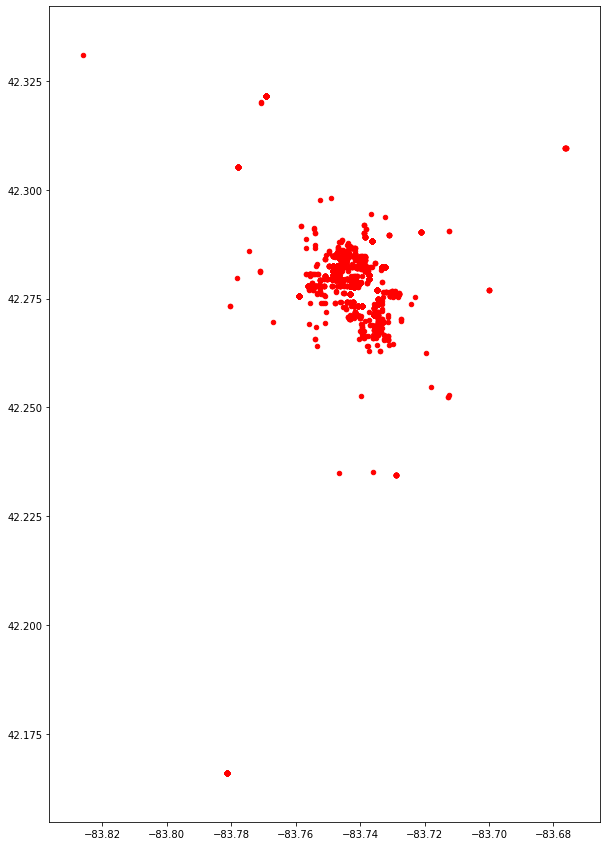

In [27]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from pyproj import CRS
from shapely.geometry import Point, Polygon
%matplotlib inline
df = pd.read_csv("2020_tickets_lat_lng.csv")

geometry=[Point(xy) for xy in zip(df['lng'], df['lat'])]
crs = CRS("epsg:4326")
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df = geo_df[(geo_df['lat'] > 41) & (geo_df['lat'] < 43) & (geo_df['lng'] > -84) & (geo_df['lng'] < -82)]
fig, ax = plt.subplots(figsize=(15,15))
geo_df.plot(ax=ax, markersize=20, color='red')